<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


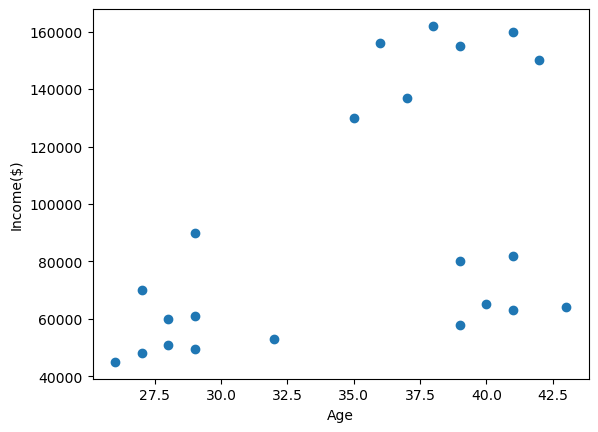

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

[![Picture2.png](https://i.postimg.cc/v81SFzhY/Picture2.png)](https://postimg.cc/5jVm88DT)

[![Picture3.png](https://i.postimg.cc/fb251t05/Picture3.png)](https://postimg.cc/sBWph2mZ)

[![Picture4.png](https://i.postimg.cc/0NQ0GkHK/Picture4.png)](https://postimg.cc/VJxtm8wz)

[![Picture5.png](https://i.postimg.cc/kXsSjrS2/Picture5.png)](https://postimg.cc/HVJjxhBm)

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Ramya Oli\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ramya Oli\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Ramya Oli\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ramya Oli\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

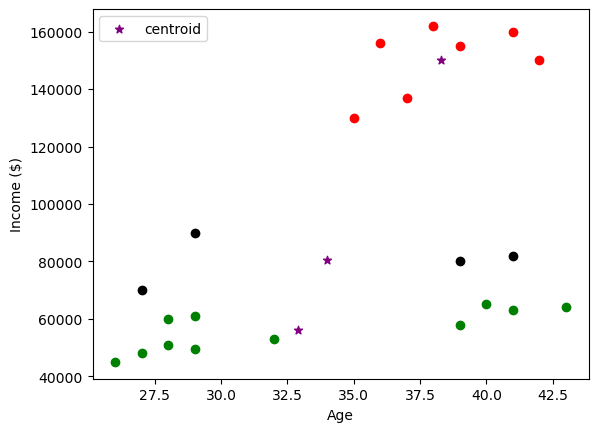

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [12]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [13]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

[![Picture1.png](https://i.postimg.cc/k5xhZXvY/Picture1.png)](https://postimg.cc/3yxB0h62)

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memor

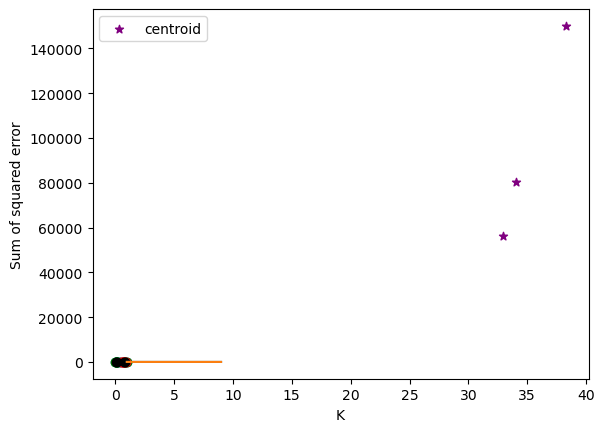

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()



---



C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memor

For k = 2, Silhouette Score: 0.5305
For k = 3, Silhouette Score: 0.7130
For k = 4, Silhouette Score: 0.6136
For k = 5, Silhouette Score: 0.4663
For k = 6, Silhouette Score: 0.4579
For k = 7, Silhouette Score: 0.4494
For k = 8, Silhouette Score: 0.3155
For k = 9, Silhouette Score: 0.2898


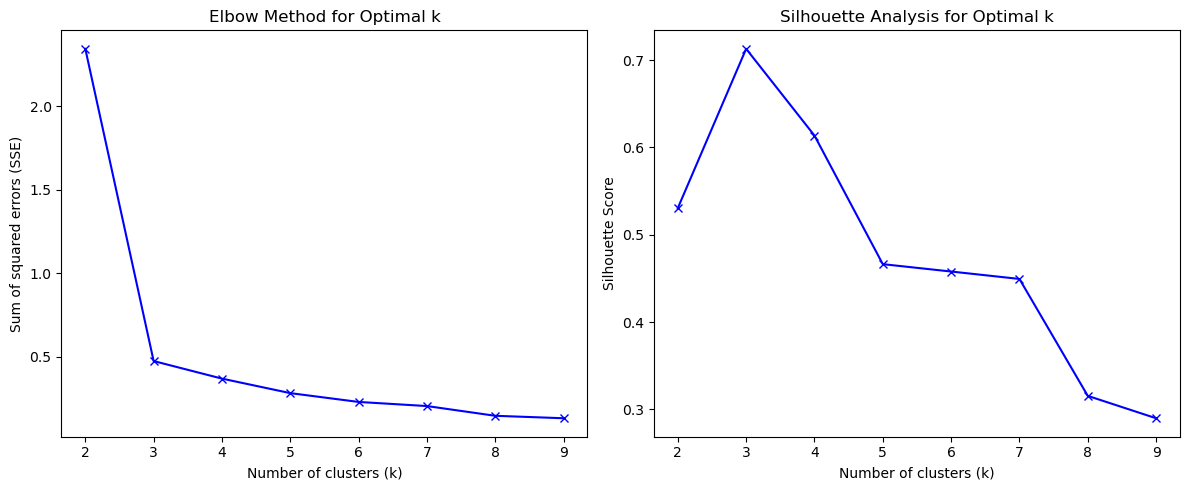


Optimal number of clusters (based on silhouette score): 3


C:\Users\Ramya Oli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


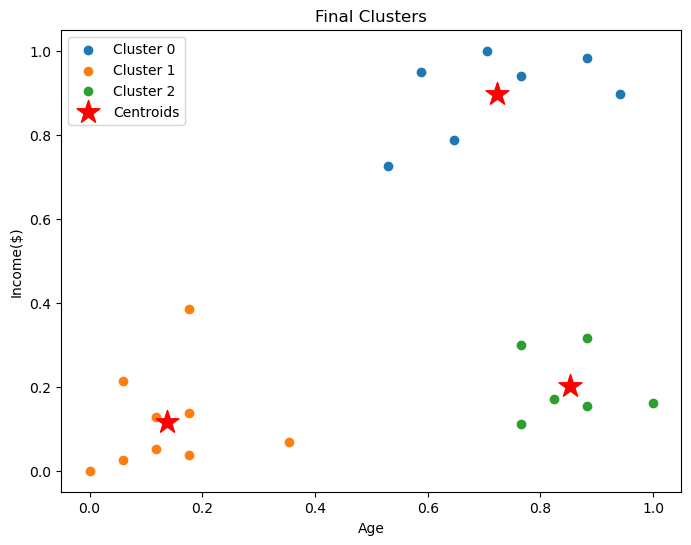

In [19]:
from sklearn.metrics import silhouette_score
import numpy as np
sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df[['Age','Income($)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

# Fit final model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
final_km.fit(df[['Age','Income($)']])
df['Cluster'] = final_km.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Age'],
                df[df['Cluster'] == i]['Income($)'],
                label=f'Cluster {i}')
plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Final Clusters')
plt.legend()
plt.show()

**k-means python code from scratch**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Load and preprocess dataset
# ------------------------------------------------------------
df = pd.read_csv("income.csv")
df.rename(columns={'Income': 'Income($)'}, inplace=True)
print("Original Data:")
print(df.head())

# Extract features
X = df[['Age', 'Income($)']].values

# Feature scaling (Normalization)
# Scale Age and Income to range [0,1]
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

print("\nScaled Data (first 5 rows):")
print(X_scaled[:5])

# ------------------------------------------------------------
# 2️⃣ Euclidean distance function
# ------------------------------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

Original Data:
      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Scaled Data (first 5 rows):
[[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]]


In [23]:
import numpy as np

# ------------------------------------------------------------
# Helper function: Euclidean distance
# ------------------------------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# ------------------------------------------------------------
# 3️⃣ User-defined K-Means algorithm
# ------------------------------------------------------------
def kmeans_custom(X, k=3, max_iters=100):
    np.random.seed(42)
    
    # Step 1️⃣: Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iteration in range(max_iters):
        # Step 2️⃣: Assign points to nearest centroid
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Step 3️⃣: Save old centroids to check convergence
        old_centroids = centroids.copy()
        
        # Step 4️⃣: Compute new centroids
        for i in range(k):
            if clusters[i]:  # avoid division by zero
                centroids[i] = np.mean(clusters[i], axis=0)
        
        # Step 5️⃣: Check for convergence
        if np.allclose(centroids, old_centroids):
            break
    
    # Step 6️⃣: Assign final labels
    labels = np.zeros(len(X))
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)
    
    # Step 7️⃣: Compute SSE (Sum of Squared Errors)
    sse = 0
    for i in range(k):
        cluster_points = np.array(clusters[i])
        if len(cluster_points) > 0:
            sse += np.sum((cluster_points - centroids[i]) ** 2)
    
    return centroids, labels, sse


Original Data:
      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Scaled Data (first 5 rows):
[[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]]


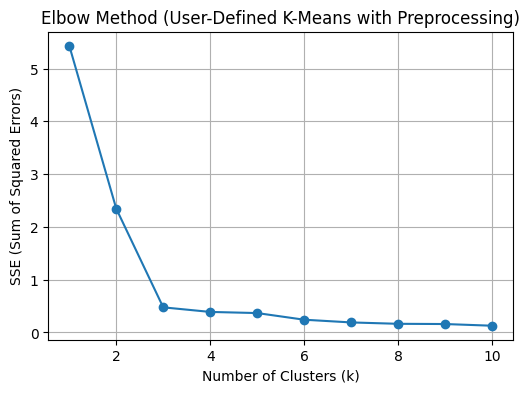

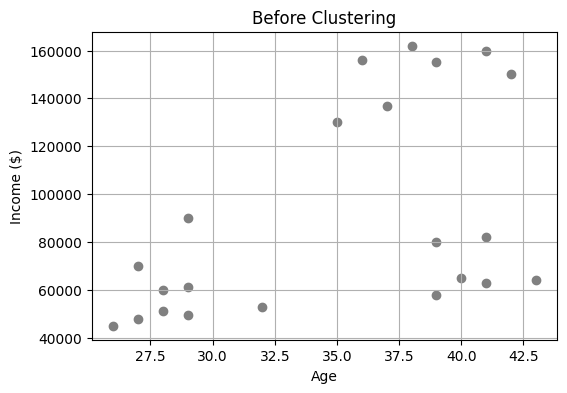

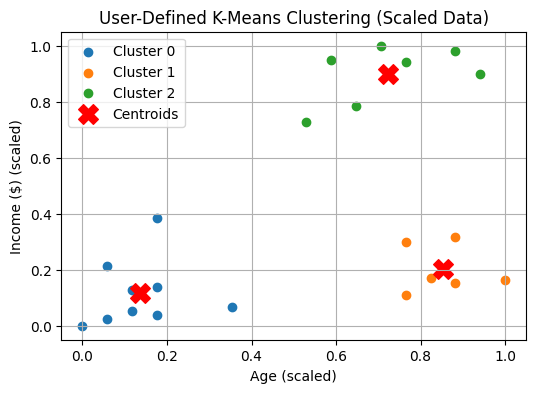

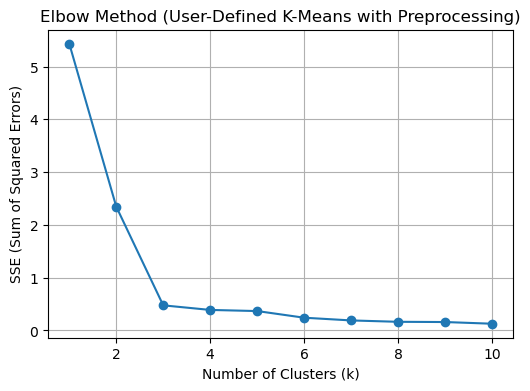

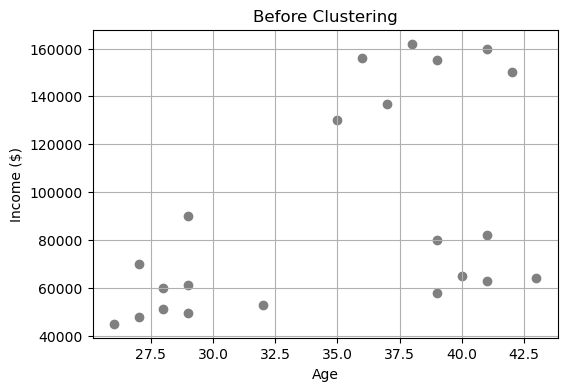

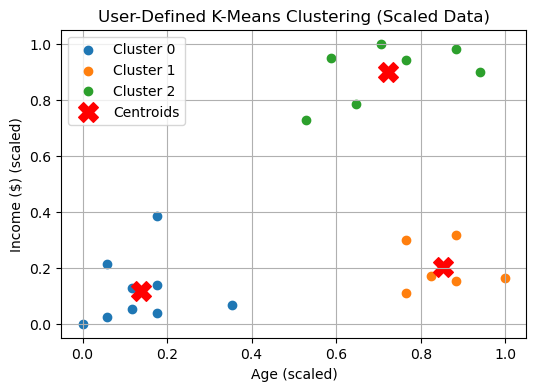

In [24]:
def elbow_method(X, max_k=10):
    sse_list = []
    for k in range(1, max_k + 1):
        _, _, sse = kmeans_custom(X, k)
        sse_list.append(sse)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, max_k + 1), sse_list, marker='o')
    plt.title("Elbow Method (User-Defined K-Means with Preprocessing)")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE (Sum of Squared Errors)")
    plt.grid(True)
    plt.show()


# ------------------------------------------------------------
# 5️⃣ Find best k visually
# ------------------------------------------------------------
elbow_method(X_scaled)

# ------------------------------------------------------------
# 6️⃣ Apply K-Means (choose k, e.g., 3)
# ------------------------------------------------------------
k = 3
centroids, labels, _ = kmeans_custom(X_scaled, k)
df['Cluster'] = labels

# ------------------------------------------------------------
# 7️⃣ Plot before and after clustering
# ------------------------------------------------------------

# Before clustering (original data)
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Income($)'], c='gray')
plt.title("Before Clustering")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.grid(True)
plt.show()

# After clustering (scaled data visualization)
plt.figure(figsize=(6, 4))
for i in range(k):
    cluster_points = X_scaled[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("User-Defined K-Means Clustering (Scaled Data)")
plt.xlabel("Age (scaled)")
plt.ylabel("Income ($) (scaled)")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
#1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
#2. Figure out if any preprocessing such as scaling would help here
#3. Draw elbow plot and from that figure out optimal value of k


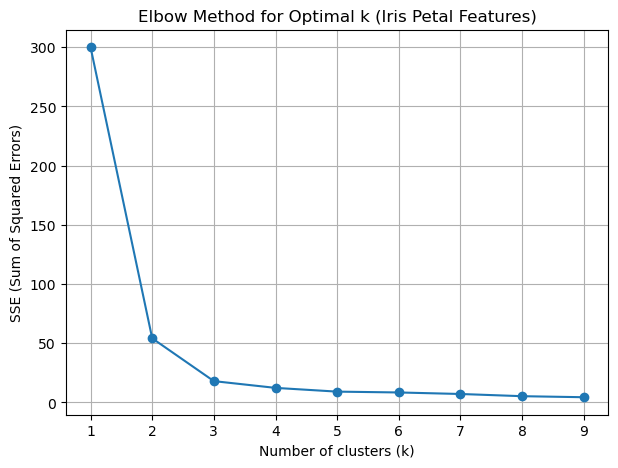

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# Helper function: Euclidean distance
# ------------------------------------------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# ------------------------------------------------------------
# Custom K-Means implementation
# ------------------------------------------------------------
def kmeans_custom(X, k=3, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for iteration in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        old_centroids = centroids.copy()
        for i in range(k):
            if clusters[i]:
                centroids[i] = np.mean(clusters[i], axis=0)
        
        if np.allclose(centroids, old_centroids):
            break

    labels = np.zeros(len(X))
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)
    
    sse = 0
    for i in range(k):
        cluster_points = np.array(clusters[i])
        if len(cluster_points) > 0:
            sse += np.sum((cluster_points - centroids[i]) ** 2)

    return centroids, labels, sse

# ------------------------------------------------------------
# Step 1️⃣: Load Iris dataset
# ------------------------------------------------------------
iris = load_iris()
X = iris.data[:, 2:4]   # petal length and petal width only

# ------------------------------------------------------------
# Step 2️⃣: Preprocessing - Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------
# Step 3️⃣: Elbow Method to find optimal k
# ------------------------------------------------------------
sse_values = []
K = range(1, 10)

for k in K:
    centroids, labels, sse = kmeans_custom(X_scaled, k=k)
    sse_values.append(sse)

# ------------------------------------------------------------
# Step 4️⃣: Plot the Elbow Graph
# ------------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.plot(K, sse_values, marker='o')
plt.title('Elbow Method for Optimal k (Iris Petal Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()
